In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

In [2]:
#import data
data = pd.read_csv("combine_data_with_labels_new.csv")

In [3]:
#X - variables, Y - Delay 15 or not
X = data[['HourlyAltimeterSetting','HourlyDewPointTemperature','HourlyDryBulbTemperature','HourlyPrecipitation', 'HourlyRelativeHumidity','HourlySeaLevelPressure','HourlyStationPressure','HourlyVisibility','HourlyWetBulbTemperature','HourlyWindSpeed']]
Y = data['Label1']

In [4]:
#train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

#Handling the imbalance in the dataset by duplicating the minorities in the training dataset
smote = SMOTE('not majority')
x_sm, y_sm = smote.fit_sample(X_train, Y_train)

C:\Users\fperc\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [5]:
#create classifier
clf = RandomForestClassifier()


In [6]:
#train and fit model
clf.fit(x_sm, y_sm)

RandomForestClassifier()

In [7]:
#prediction
prediction = clf.predict(X_test)

In [8]:
#accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, prediction))

Accuracy: 0.9831803659205267


In [9]:
#confusion matrix
print("Confusion matrix: \n", metrics.confusion_matrix(Y_test, prediction))

Confusion matrix: 
 [[  8973   2960]
 [  5721 498469]]


In [10]:
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)

Text(0.5, 1, 'Confusion Matrix')

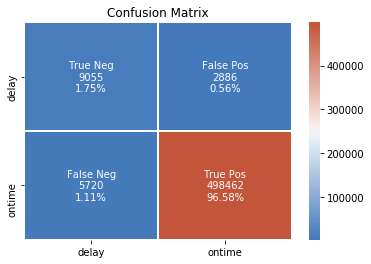

In [12]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
xticks = ["delay", "ontime"]
yticks = ["delay", "ontime"]
sns.heatmap(confusion_matrix, 
            annot=labels, 
            fmt='',
            xticklabels = xticks, 
            yticklabels = yticks,
            cmap = sns.diverging_palette(250, 20, as_cmap=True), 
            linecolor="white", 
            linewidth=1).set_title("Confusion Matrix")

In [13]:
#classification report
print("Classification report:\n", metrics.classification_report(Y_test, prediction))

Classification report:
               precision    recall  f1-score   support

       delay       0.61      0.76      0.68     11941
      ontime       0.99      0.99      0.99    504182

    accuracy                           0.98    516123
   macro avg       0.80      0.87      0.83    516123
weighted avg       0.99      0.98      0.98    516123



In [14]:
def plot_support(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['support']
    yticks = list(np.unique(y_tru))
    #yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep[0:-1,-1:],
                annot=True, 
                cbar=True, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                fmt="",
                cmap = sns.diverging_palette(250, 20, as_cmap=True),
                linecolor="white",
                linewidth=1).set_title("Support")

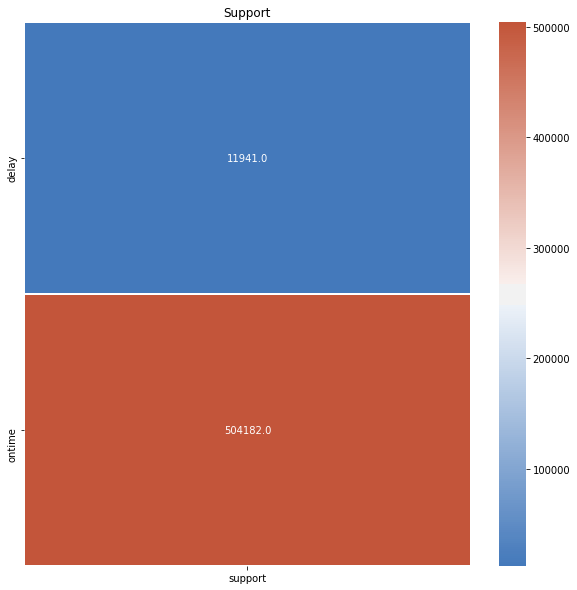

In [15]:
plot_support(Y_test, prediction)

In [16]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score']
    yticks = list(np.unique(y_tru))
    #yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep[0:-1,0:-1],
                annot=True, 
                cbar=True, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                cmap = sns.diverging_palette(250, 20, as_cmap=True),
                linecolor="white",
                linewidth=1).set_title("Classification Report")

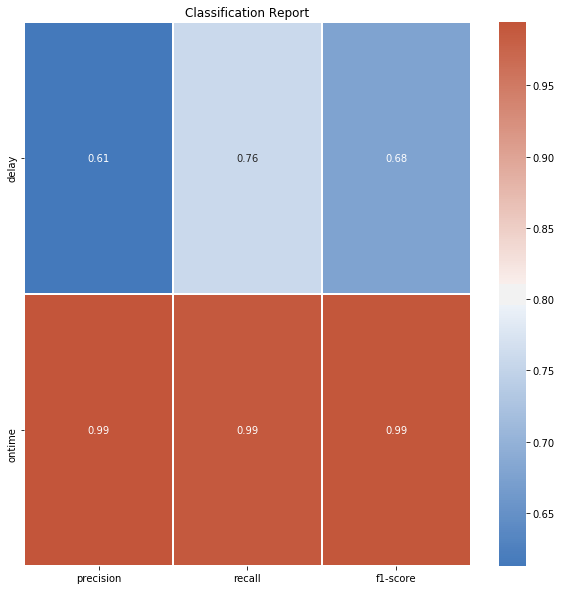

In [17]:
plot_classification_report(Y_test, prediction)

In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [19]:
importances.head(15)

,importance
feature,
HourlyPrecipitation,0.250
HourlyStationPressure,0.121
HourlyRelativeHumidity,0.119
HourlyDryBulbTemperature,0.087
HourlyDewPointTemperature,0.083
HourlyWetBulbTemperature,0.073
HourlySeaLevelPressure,0.070
HourlyVisibility,0.068
HourlyWindSpeed,0.066


Text(0.5, 1.0, 'Feature Importance')

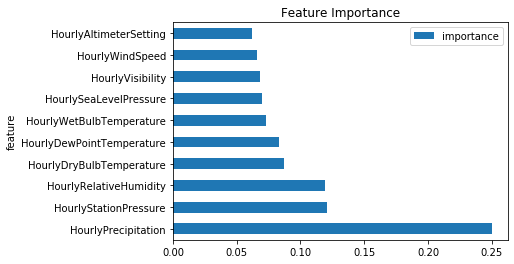

In [20]:
importances.plot.barh().set_title("Feature Importance")

           delay    ontime
delay   0.751948  0.248052
ontime  0.011347  0.988653


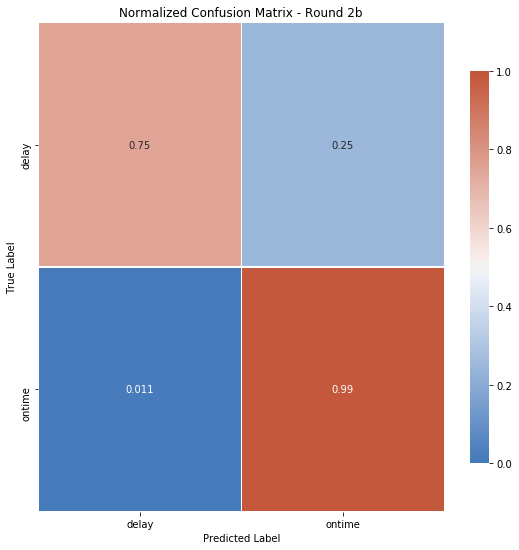

In [12]:
cf_neu = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = pd.DataFrame(cf_neu,
                           index=['delay', 'ontime'],
                           columns=['delay', 'ontime'])
print(conf_matrix)

plt.subplots(figsize=(8, 8))
heat_map = sns.heatmap(conf_matrix,
                       cmap=sns.diverging_palette(250, 20, as_cmap=True),
                       annot=True,
                       vmax=1,
                       vmin=0,
                       center=0.5,
                       square=False,
                       linewidths=.3,
                       cbar_kws={"shrink": .8})
heat_map.figure.tight_layout()
heat_map.figure.subplots_adjust(top=.95, bottom=0.1, left=0.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Normalized Confusion Matrix - Round 2b')
plt.show()